### Mounting Gdrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
import warnings
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt




In [ ]:
def specificity(temp):
  TN = temp[0]
  TP = temp[1]
  FP = temp[2]
  FN = temp[3]  
  TPR = TN/(TN+FP)

  return TPR

def positive_predictive_value(temp):
  TN = temp[0]
  TP = temp[1]
  FP = temp[2]
  FN = temp[3]
  PPV = TP/(TP+FP)

  return PPV

def Diagnostic_Odds_Ratio(temp):
  TN = temp[0]
  TP = temp[1]
  FP = temp[2]
  FN = temp[3]

  return (TP/FN) / (FP/TN) 

def CohenKappa(temp):
  TN = temp[0]
  TP = temp[1]
  FP = temp[2]
  FN = temp[3]

  po = ( TP + TN ) /  (TP + FP + TN  + FN)
  pe = ( TN + FP ) * (TN + FN) + (FN + TP) * (FP + TP) 
  return (po-pe)/(1-pe)


def sensitivity(temp):
  TN = temp[0]
  TP = temp[1]
  FP = temp[2]
  FN = temp[3]
  return TP/ ( TP+FN )

In [ ]:
svm_flag = False
knn_flag = True
log_flag = True

### Dataframe Enquiry


In [ ]:
train_mit = pd.read_csv("/content/drive/MyDrive/dataset processed mit bih/mitbih_train.csv")
test_mit=pd.read_csv('/content/drive/MyDrive/dataset processed mit bih/mitbih_test.csv')

comb_ds=pd.concat([train_mit, test_mit], axis=0)

In [ ]:

train_mit['y']=train_mit['y'].astype(int)
mit_train_classes=train_mit['y'].value_counts()
print(mit_train_classes)


0    72471
4     6431
2     5788
1     2223
3      641
Name: y, dtype: int64


In [ ]:
test_mit['y']=test_mit['y'].astype(int)
mit_test_classes=test_mit['y'].value_counts()
print(mit_test_classes)

0    18118
4     1608
2     1448
1      556
3      162
Name: y, dtype: int64


In [ ]:

comb_ds=pd.concat([train_mit, test_mit], axis=0)
comb_ds

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x179,x180,x181,x182,x183,x184,x185,x186,x187,y
0,0.978,0.926,0.681,0.2450,0.1540,0.1910,0.1520,0.0858,0.0588,0.0490,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.960,0.863,0.462,0.1970,0.0940,0.1250,0.0997,0.0883,0.0741,0.0826,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1.000,0.659,0.186,0.0703,0.0703,0.0595,0.0568,0.0432,0.0541,0.0459,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.925,0.666,0.541,0.2760,0.1960,0.0773,0.0718,0.0608,0.0663,0.0580,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.967,1.000,0.831,0.5870,0.3570,0.2490,0.1460,0.0892,0.1170,0.1500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,0.929,0.871,0.805,0.7430,0.6510,0.5360,0.3940,0.2510,0.1400,0.1020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
21888,0.803,0.692,0.587,0.4470,0.3180,0.1900,0.1180,0.0777,0.1120,0.1520,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
21889,1.000,0.967,0.620,0.3470,0.1390,0.0890,0.1040,0.1010,0.1070,0.1010,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
21890,0.984,0.567,0.607,0.5830,0.6070,0.5750,0.5750,0.4880,0.3930,0.2380,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [ ]:
comb_ds['y']=comb_ds['y'].astype(int)
mit_classes=comb_ds['y'].value_counts()
print(mit_classes)

0    90589
4     8039
2     7236
1     2779
3      803
Name: y, dtype: int64


In [ ]:
#Random Oversampling Imbalanced Datasets using resaple from slearn
from sklearn.utils import resample


#split the data set based on different classes
normal_over=(comb_ds[comb_ds['y']==0]).sample(n=18857,random_state=52)
print("Normal ECG = ",(comb_ds[comb_ds['y']==0]).sample(n=18857,random_state=52).shape)
#split class 1
a=comb_ds[comb_ds['y']==1]
print("Supraventricular Ectopic ECG = ",a.shape)
#random resample and add into dataset
a_over=resample(a,replace=True,n_samples=2779,random_state=23)
print("Supraventricular Ectopic ECG = ",a_over.shape)

b=comb_ds[comb_ds['y']==2]
print("Ventricular Ectopic ECG = ",b.shape)
b_over=resample(b,replace=True,n_samples=7236,random_state=24)
print("Ventricular Ectopic ECG = ",b_over.shape)

c=comb_ds[comb_ds['y']==3]
print("Fusion Beats = ",c.shape)
c_over=resample(c,replace=True,n_samples=803,random_state=25)
print("Fusion Beats = ",c_over.shape)

d=comb_ds[comb_ds['y']==4]
print("Unknown = ",d.shape)
d_over=resample(d,replace=True,n_samples=8039,random_state=26)
print("Unknown = ",d_over.shape)


#combine the balanced resampled classes
comb_ds_ovr=pd.concat([normal_over,a_over,b_over,c_over,d_over])
#print(comb_ds_ovr.shape)


Normal ECG =  (18857, 188)
Supraventricular Ectopic ECG =  (2779, 188)
Supraventricular Ectopic ECG =  (2779, 188)
Ventricular Ectopic ECG =  (7236, 188)
Ventricular Ectopic ECG =  (7236, 188)
Fusion Beats =  (803, 188)
Fusion Beats =  (803, 188)
Unknown =  (8039, 188)
Unknown =  (8039, 188)


### Feature Label extraction

In [ ]:
X = comb_ds_ovr.iloc[:,0:-1]
y = comb_ds_ovr.iloc[:,-1:]

In [ ]:
#X = df.iloc[:,0:-1]
#y = df.iloc[:,-1:]

Feature

In [ ]:
X

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x178,x179,x180,x181,x182,x183,x184,x185,x186,x187
8536,0.958,0.874,0.271,0.00000,0.238,0.2770,0.2830,0.2980,0.2900,0.2850,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23538,1.000,0.892,0.611,0.23600,0.153,0.0903,0.0660,0.0625,0.0521,0.0521,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8229,1.000,0.904,0.372,0.00000,0.180,0.1820,0.2130,0.1960,0.2040,0.2070,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28719,0.991,0.892,0.477,0.00292,0.129,0.2750,0.3540,0.3680,0.3800,0.3980,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33981,0.966,0.829,0.227,0.00211,0.149,0.1280,0.0758,0.0674,0.0632,0.0484,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82881,0.782,0.620,0.554,0.48100,0.435,0.4500,0.5140,0.4990,0.4500,0.3030,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86909,0.955,0.453,0.469,0.51800,0.535,0.5760,0.6080,0.6570,0.5960,0.4530,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84985,0.910,0.863,0.798,0.75400,0.680,0.6080,0.5100,0.4400,0.3640,0.3510,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83952,1.000,0.948,0.897,0.82800,0.748,0.6480,0.5390,0.4300,0.3240,0.2800,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Label


In [ ]:
y

,y
8536,0
23538,0
8229,0
28719,0
33981,0
...,...
82881,4
86909,4
84985,4
83952,4


### Feature Engineering

#### Multi label to binary label conversion

In [ ]:
def toBinary(x):
    if x == 0: return 0;
    else: return 1;

In [ ]:
y = y['y'].apply(toBinary)
y = pd.DataFrame(data=y)



#### Feature Scaling

In [ ]:
X

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x178,x179,x180,x181,x182,x183,x184,x185,x186,x187
8536,0.958,0.874,0.271,0.00000,0.238,0.2770,0.2830,0.2980,0.2900,0.2850,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23538,1.000,0.892,0.611,0.23600,0.153,0.0903,0.0660,0.0625,0.0521,0.0521,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8229,1.000,0.904,0.372,0.00000,0.180,0.1820,0.2130,0.1960,0.2040,0.2070,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28719,0.991,0.892,0.477,0.00292,0.129,0.2750,0.3540,0.3680,0.3800,0.3980,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33981,0.966,0.829,0.227,0.00211,0.149,0.1280,0.0758,0.0674,0.0632,0.0484,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82881,0.782,0.620,0.554,0.48100,0.435,0.4500,0.5140,0.4990,0.4500,0.3030,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86909,0.955,0.453,0.469,0.51800,0.535,0.5760,0.6080,0.6570,0.5960,0.4530,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84985,0.910,0.863,0.798,0.75400,0.680,0.6080,0.5100,0.4400,0.3640,0.3510,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83952,1.000,0.948,0.897,0.82800,0.748,0.6480,0.5390,0.4300,0.3240,0.2800,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y

,y
8536,0
23538,0
8229,0
28719,0
33981,0
...,...
82881,1
86909,1
84985,1
83952,1


### Splitting Data (Train-Test)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

In [ ]:
print(y_test.values.tolist())

[[1], [0], [1], [0], [1], [1], [0], [1], [0], [0], [0], [1], [0], [1], [1], [0], [0], [1], [0], [1], [0], [0], [1], [1], [1], [0], [0], [1], [1], [0], [0], [0], [0], [1], [0], [0], [0], [1], [1], [0], [0], [0], [1], [1], [1], [0], [1], [1], [0], [1], [0], [0], [1], [1], [0], [1], [1], [1], [0], [0], [0], [0], [1], [0], [1], [1], [1], [0], [1], [1], [1], [1], [1], [1], [0], [0], [1], [0], [1], [1], [1], [1], [1], [0], [1], [1], [1], [0], [1], [0], [0], [1], [1], [1], [0], [0], [0], [1], [0], [0], [0], [1], [1], [1], [0], [1], [0], [0], [0], [0], [1], [0], [1], [1], [1], [0], [0], [1], [1], [0], [0], [0], [0], [1], [1], [1], [1], [1], [0], [0], [1], [0], [0], [0], [0], [0], [1], [0], [1], [1], [0], [1], [0], [1], [0], [0], [1], [0], [1], [0], [0], [0], [1], [1], [1], [0], [1], [1], [0], [0], [1], [1], [0], [0], [1], [0], [1], [1], [1], [1], [0], [0], [0], [0], [0], [0], [1], [1], [0], [0], [1], [1], [0], [1], [1], [1], [0], [0], [1], [1], [1], [0], [0], [1], [0], [1], [0], [1], [0], [1],

In [ ]:
x_test.iloc[1]

x1      0.893
x2      0.854
x3      0.634
x4      0.439
x5      0.268
        ...  
x183    0.000
x184    0.000
x185    0.000
x186    0.000
x187    0.000
Name: 4704, Length: 187, dtype: float64

### Logistic Regression - Model 1

**Training data accuracy evaluation**

In [ ]:
if(log_flag):
  clf = LogisticRegression() #initializing logistic regression
  clf.fit(x_train, y_train) #training the model with train data(input, output)
  y_pred_log_reg_train = clf.predict(x_train)
  acc_log_reg = accuracy_score(y_train , y_pred_log_reg_train)
  print("Training Accuracy: ",round(acc_log_reg*100,2), "%")

Training Accuracy:  81.69 %


**Validation Data accuracy evaluation**

In [ ]:
if(log_flag):
  y_pred_log_reg = clf.predict(x_test)

  acc_log_reg2 = round(clf.score(x_test, y_test) * 100, 2)
  print("Validation Accuracy: ",acc_log_reg2, "%")

Validation Accuracy:  80.94 %


***Model Report***


In [ ]:
if(log_flag):
  predictions = clf.predict(x_test)
  print(classification_report(y_test, y_pred_log_reg))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82      3774
           1       0.85      0.75      0.80      3769

    accuracy                           0.81      7543
   macro avg       0.81      0.81      0.81      7543
weighted avg       0.81      0.81      0.81      7543



***Confusion Matrix***

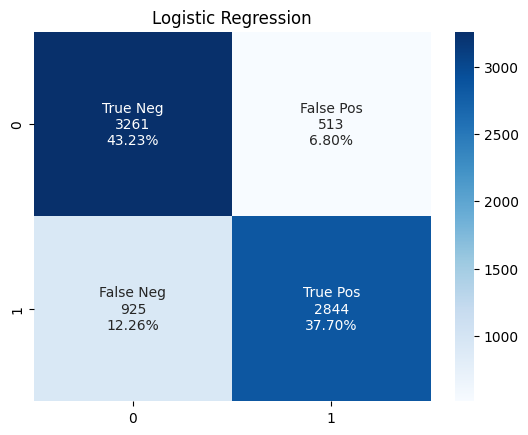

[[3261  513]
 [ 925 2844]]
 Sensitivity =  0.7545768108251526
 Specificity =  0.8640699523052464
 Positive Predictive Value =  0.8471849865951743
 Diagonstic Odds Ratio =  19.54435277382646
 Cohen Kappa =  1.0000000067007735





In [ ]:
if(log_flag):
  cf_matrix = confusion_matrix(y_test, predictions)
  
  group_names = ['True Neg','False Pos','False Neg','True Pos']
  group_counts = ["{0:0.0f}".format(value) for value in
                  cf_matrix.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  ax = plt.axes() # label
  sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues',ax=ax)
  ax.set_title('Logistic Regression')
  plt.show()

  print(cf_matrix)
  i = []

  i.append(cf_matrix[0][0])
  i.append(cf_matrix[1][1])
  i.append(cf_matrix[0][1])
  i.append(cf_matrix[1][0])

  print(" Sensitivity = ",sensitivity(i))
  print(" Specificity = ",specificity(i))
  print(" Positive Predictive Value = ",positive_predictive_value(i))
  print(" Diagonstic Odds Ratio = ",Diagnostic_Odds_Ratio(i))
  print(" Cohen Kappa = ",CohenKappa(i))
  print("\n\n")



### SVM - Model 2

**Training data accuracy evaluation**

In [ ]:
if (svm_flag):
  clf = SVC(probability=True) #initializing svm classifier
  clf.fit(x_train, y_train) #training the model with train data(input, output)
  acc_svc1 = clf.score(x_train, y_train) * 100
  print("Training Accuracy: ",round(acc_svc1,2), '%')

**Validation Data accuracy evaluation**

In [ ]:
if (svm_flag):
  y_pred_svc = clf.predict(x_test)
  acc_svc2 = round(clf.score(x_test, y_test) * 100, 3)
  print("Validation Accuracy: ",acc_svc2, "%")

***Model Report***


In [ ]:
if (svm_flag):
  predictions = clf.predict(x_test)
  print(classification_report(y_test, y_pred_svc))

***Confusion Matrix***

In [ ]:
if (svm_flag):

  cf_matrix = confusion_matrix(y_test, predictions)

  group_names = ['True Neg','False Pos','False Neg','True Pos']
  group_counts = ["{0:0.0f}".format(value) for value in
                  cf_matrix.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  ax = plt.axes() # label
  sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues',ax=ax)
  ax.set_title('SVM')
  plt.show()
  print(cf_matrix)
  i = []

  i.append(cf_matrix[0][0])
  i.append(cf_matrix[1][1])
  i.append(cf_matrix[0][1])
  i.append(cf_matrix[1][0])

  print(" Sensitivity = ",sensitivity(i))
  print(" Specificity = ",specificity(i))
  print(" Positive Predictive Value = ",positive_predictive_value(i))
  print(" Diagonstic Odds Ratio = ",Diagnostic_Odds_Ratio(i))
  print(" Cohen Kappa = ",CohenKappa(i))
  print("\n\n")

### KNN - Model 4

**Train Data accuracy evaluation**

In [ ]:
if(knn_flag):
  clf = KNeighborsClassifier() #initializing  classifier
  clf.fit(x_train, y_train) #training the model with train data(input, output)
  acc_knn1 = clf.score(x_train, y_train) * 100
  print("Training Accuracy: ",round(acc_knn1,2), '%')

Training Accuracy:  97.08 %


**Test Data accuracy evaluation**

In [ ]:
if(knn_flag):
  y_pred_knn = clf.predict(x_test)
  acc_knn2 = round(clf.score(x_test, y_test) * 100, 2)
  print("Validation Accuracy: ",acc_knn2, "%")

Validation Accuracy:  95.73 %


***Model Report***


In [ ]:
if(knn_flag):
  predictions = clf.predict(x_test)
  print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      3774
           1       0.97      0.94      0.96      3769

    accuracy                           0.96      7543
   macro avg       0.96      0.96      0.96      7543
weighted avg       0.96      0.96      0.96      7543



***Confusion Matrix***

       y
74759  1
4704   0
79527  1
63366  0
77936  1
...   ..
78938  1
62837  0
20641  1
49714  0
79205  1

[7543 rows x 1 columns]
[1 0 1 ... 1 0 1]
[[3663  111]
 [ 211 3558]]


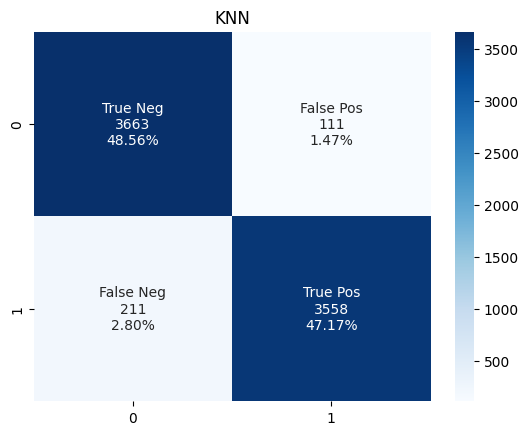

[[3663  111]
 [ 211 3558]]
 Sensitivity =  0.9440169806314672
 Specificity =  0.9705882352941176
 Positive Predictive Value =  0.9697465249386754
 Diagonstic Odds Ratio =  556.4644549763033
 Cohen Kappa =  1.0000000015005337





In [ ]:
if(knn_flag):
  print(y_test)
  print(predictions)
  cf_matrix = confusion_matrix(y_test, predictions)
  print(cf_matrix)

  group_names = ['True Neg','False Pos','False Neg','True Pos']
  group_counts = ["{0:0.0f}".format(value) for value in
                  cf_matrix.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  ax = plt.axes() # label
  sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues',ax=ax)
  ax.set_title('KNN')
  plt.show()

  print(cf_matrix)
  i = []

  i.append(cf_matrix[0][0])
  i.append(cf_matrix[1][1])
  i.append(cf_matrix[0][1])
  i.append(cf_matrix[1][0])

  print(" Sensitivity = ",sensitivity(i))
  print(" Specificity = ",specificity(i))
  print(" Positive Predictive Value = ",positive_predictive_value(i))
  print(" Diagonstic Odds Ratio = ",Diagnostic_Odds_Ratio(i))
  print(" Cohen Kappa = ",CohenKappa(i))
  print("\n\n")

### ANN- NN Model- 1

### feature engineering

In [ ]:
print(y.values.tolist())#label column
y = to_categorical(y) #converted to numpy array
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)#train=training, test=testing , rand= shuffle
X_train = x_train 
X_test = x_test

scaler = StandardScaler()
#StandardScaler follows Standard Normal Distribution (SND). Therefore, it makes mean = 0 and scales the data to unit variance.

x_train = scaler.fit_transform(x_train)
#The fit_transform() method is used to fit the data into a model and transform it into a form that is more suitable for the model in a single step. 
x_train = np.reshape(x_train, (x_train.shape[0],1,X.shape[1]))

x_test = scaler.fit_transform(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],1,X.shape[1]))

y_train = scaler.fit_transform(y_train)
y_train = np.reshape(y_train, (y_train.shape[0],1,y.shape[1]))

y_test = scaler.fit_transform(y_test)
y_test = np.reshape(y_test, (y_test.shape[0],1,y.shape[1]))

print(y_test.tolist())

[[0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0],

In [ ]:
tf.keras.backend.clear_session()
model = Sequential()
model.add(Dense(128, input_shape=(1,187),activation="sigmoid"))
model.add(Dense(128,activation="sigmoid"))
model.add(Dense(64,activation="sigmoid"))
model.add(Dense(64,activation="sigmoid"))
model.add(Dense(32,activation="sigmoid"))
model.add(Dense(2, activation='softmax'))
#a type of layer in a deep neural network that use a linear operation where every input is connected to every output by a weight

model.compile(loss = 'binary_crossentropy', optimizer = "adam", metrics = ['accuracy'])
#Cross-entropy measures the performance of a classification model based on the probability and error
model.summary()

history = model.fit(x_train, y_train, epochs = 50, validation_data=(x_test,y_test))
#Param: Number of weight parameters of each layer

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1, 128)            24064     
                                                                 
 dense_1 (Dense)             (None, 1, 128)            16512     
                                                                 
 dense_2 (Dense)             (None, 1, 64)             8256      
                                                                 
 dense_3 (Dense)             (None, 1, 64)             4160      
                                                                 
 dense_4 (Dense)             (None, 1, 32)             2080      
                                                                 
 dense_5 (Dense)             (None, 1, 2)              66        
                                                                 
Total params: 55,138
Trainable params: 55,138
Non-traina

In [ ]:
result = model.evaluate(x_train, y_train)
print("Training Loss: ",result[0])
print("Training Accuracy: ",round(result[1]*100, 2), '%')

#Validation Data

result = model.evaluate(x_test, y_test)
print(y_test)
print("Validation Loss: ",result[0])
print("Validation Accuracy: ",round(result[1] * 100, 2), '%') 

943/943 [==============================] - 2s 2ms/step - loss: -419.7741 - accuracy: 0.9367
Training Loss:  -419.7741394042969
Training Accuracy:  93.67 %
236/236 [==============================] - 0s 2ms/step - loss: -412.0038 - accuracy: 0.9284
[[[-1.0006632  1.0006632]]

 [[ 0.9993374 -0.9993374]]

 [[-1.0006632  1.0006632]]

 ...

 [[-1.0006632  1.0006632]]

 [[ 0.9993374 -0.9993374]]

 [[-1.0006632  1.0006632]]]
Validation Loss:  -412.00384521484375
Validation Accuracy:  92.84 %


236/236 [==============================] - 1s 4ms/step - loss: -412.0038 - accuracy: 0.9284
Accuracy: 92.84%


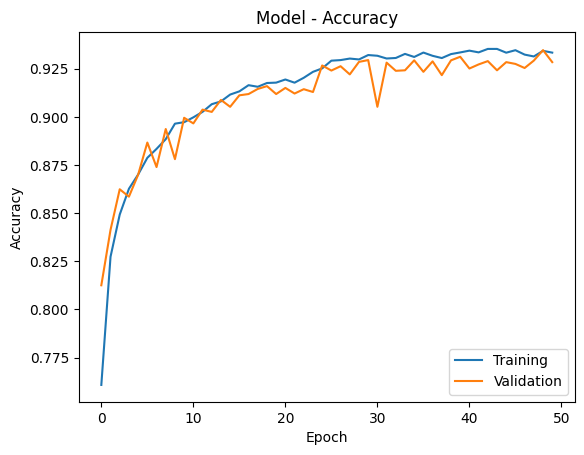

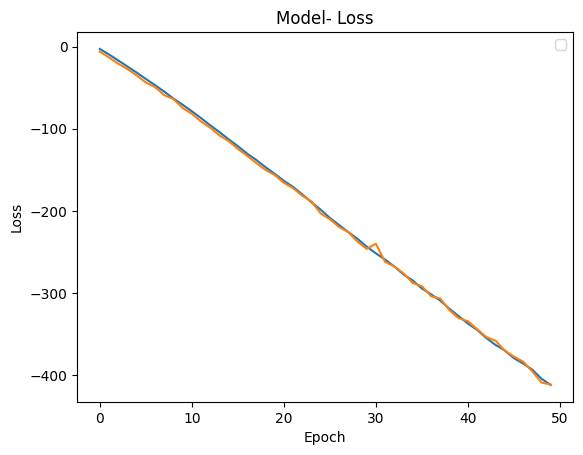

[1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 

In [ ]:
#from arrhythmia classification kernel from kaggle
#evaluates the model
def evaluate_model(history,X_test_in,y_test_in,model):
    from sklearn.metrics import classification_report
    scores = model.evaluate(X_test_in,y_test_in)
    print("Accuracy: %.2f%%" % (scores[1]*100))
    #plot epoch vs accuracy and epoch vs loss for training and validation sets    
    print(history)
    fig1, ax_acc = plt.subplots()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model - Accuracy')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()
    
    fig2, ax_loss = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model- Loss')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.show()
    target_names=['0','1','2','3','4']
    
    y_true=[]
    for element in y_test_in:
        y_true.append(np.argmax(element))
    print(y_true)
    prediction_proba=model.predict(X_test_in)
    prediction_proba_list = prediction_proba.tolist()
    print(prediction_proba_list)
    prediction = []
    for i in range(len(prediction_proba_list)):
      prediction.append( prediction_proba_list[i].index( max(prediction_proba_list[i]) ) )

    #prediction=np.argmax(prediction_proba,axis=1)
    print(prediction)

    #cf_matrix = confusion_matrix(y_true, prediction)
    #print(classification_report(y_true,prediction))
    #print(cf_matrix)


evaluate_model( history , x_test , y_test , model )

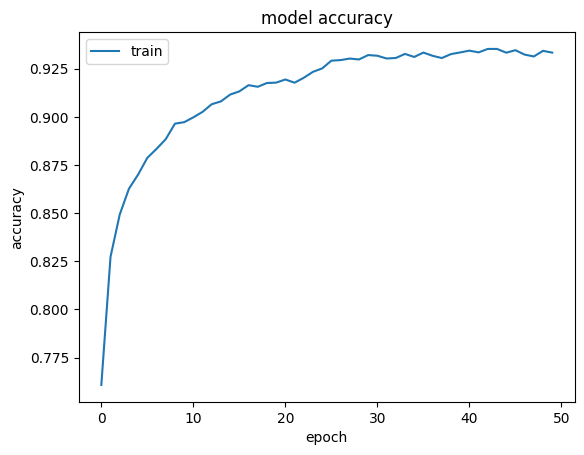

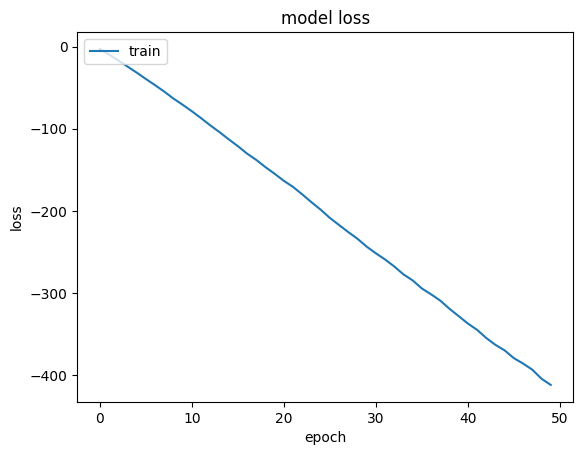

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.show()


In [ ]:
#print(x_test[22,:])
#print(y_test[22,:])

scoreTest, accTest = model.evaluate(x_test[[44],:], y_test[[44],:])
print(round(accTest*100, 2), '%')

#print(model.predict(x_test[[44],:]))

temp = model.predict(x_test)
#print(temp.tolist())

y_pred_nn= []
for i in temp.tolist():
  #print(i[0])
  y_pred_nn.append(i[0].index(max(i[0])))
  
print("Presicted NN : ")
print(y_pred_nn)


#print(temp.tolist())
y_act_nn = []

for i in y_test.tolist():
  #print(i)
  y_act_nn.append(i[0].index(max(i[0])))


print("Actual NN : ")
print(y_act_nn)



1/1 [==============================] - 0s 27ms/step - loss: -451.0952 - accuracy: 1.0000
100.0 %
236/236 [==============================] - 1s 2ms/step
Presicted NN : 
[1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 

['True Neg\n3651\n48.40%', 'False Pos\n123\n1.63%', 'False Neg\n255\n3.38%', 'True Pos\n3514\n46.59%']


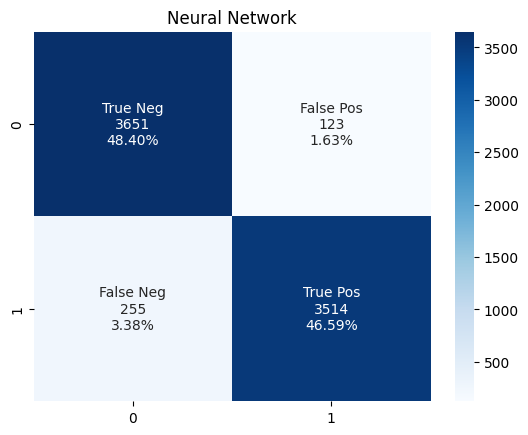

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      3774
           1       0.96      0.89      0.93      3769

    accuracy                           0.93      7543
   macro avg       0.93      0.93      0.93      7543
weighted avg       0.93      0.93      0.93      7543



In [ ]:

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
print(labels)
labels = np.asarray(labels).reshape(2,2)


ax = plt.axes() # label
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues',ax=ax)
ax.set_title('Neural Network')
plt.show()

print(classification_report(y_act_nn, y_pred_nn))


In [ ]:
label =[0,1]

cf_matrix = confusion_matrix(y_act_nn, y_pred_nn , labels = label)
print(cf_matrix)

print(cf_matrix)
i = []

i.append(cf_matrix[0][0])
i.append(cf_matrix[1][1])
i.append(cf_matrix[0][1])
i.append(cf_matrix[1][0])

print(" Sensitivity = ",sensitivity(i))
print(" Specificity = ",specificity(i))
print(" Positive Predictive Value = ",positive_predictive_value(i))
print(" Diagonstic Odds Ratio = ",Diagnostic_Odds_Ratio(i))
print(" Cohen Kappa = ",CohenKappa(i))
print("\n\n")
#Recall: The ability of a model to find all the relevant cases within a data set
#Note that in binary classification, recall of the positive class is also known as “sensitivity”; recall of the negative class is “specificity”.


[[3640  134]
 [ 406 3363]]
[[3640  134]
 [ 406 3363]]
 Sensitivity =  0.8922791191297427
 Specificity =  0.9644939056703763
 Positive Predictive Value =  0.9616814412353446
 Diagonstic Odds Ratio =  225.00772002058673
 Cohen Kappa =  1.0000000025163467



